In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<font size='5'>Biostatistics in Public Health</font>

<font size='4'>Coursera: Johns Hopkins University</font>

I'm not sure yet whether the class will advise a particular programming language or dataset, so for my own edification I'll map principles to a U.S. Census Bureau dataset (populations by county) and Python packages that I use.

In [2]:
df = pd.read_csv(
    'data/co-est2019-alldata.csv',
    usecols=[
        'STATE', 'STNAME', 'COUNTY', 'CTYNAME', 'POPESTIMATE2019', 'DEATHS2019'
    ],
    dtype={
        'STATE': str,
        'COUNTY': str,
    },
    encoding="ISO-8859-1")

In [3]:
# Drop rows pertaining to state-level data
df = df[df['COUNTY'] != '000'].copy()

In [4]:
df['fips'] = df['STATE'] + df['COUNTY']

In [5]:
df.drop(labels=['STATE', 'COUNTY'], axis=1, inplace=True)

In [6]:
df.rename(columns={
    'STNAME': 'state',
    'CTYNAME': 'county',
    'POPESTIMATE2019': 'population2019',
    'DEATHS2019': 'deaths2019'
}, inplace=True)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-One" data-toc-modified-id="Week-One-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week One</a></span><ul class="toc-item"><li><span><a href="#Study-types" data-toc-modified-id="Study-types-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Study types</a></span></li><li><span><a href="#Data-types" data-toc-modified-id="Data-types-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data types</a></span></li><li><span><a href="#Continuous-data-measures" data-toc-modified-id="Continuous-data-measures-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Continuous data measures</a></span><ul class="toc-item"><li><span><a href="#Central-Tendency" data-toc-modified-id="Central-Tendency-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Central Tendency</a></span><ul class="toc-item"><li><span><a href="#Mean" data-toc-modified-id="Mean-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Mean</a></span></li><li><span><a href="#Median" data-toc-modified-id="Median-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Median</a></span></li></ul></li><li><span><a href="#Variability" data-toc-modified-id="Variability-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Variability</a></span><ul class="toc-item"><li><span><a href="#Sample-variance-($s^2$)" data-toc-modified-id="Sample-variance-($s^2$)-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Sample variance ($s^2$)</a></span></li><li><span><a href="#Sample-standard-deviation-(s-or-SD)" data-toc-modified-id="Sample-standard-deviation-(s-or-SD)-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Sample standard deviation (s or SD)</a></span></li></ul></li><li><span><a href="#Comparing-Continuous-Data-Measures" data-toc-modified-id="Comparing-Continuous-Data-Measures-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Comparing Continuous Data Measures</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Box-Plots" data-toc-modified-id="Box-Plots-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>Box Plots</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Week One

## Study types
Their purpose is to mitigate confounds that arise from having to study a sample when you’re trying to understand a population.

- Prospective cohort: “the subjects who are under study are being classified as to their group status, usually defined by some sort of exposure at the start of the study and then followed over time to see who develops the outcome or outcomes of interests. So, in these, the exposure precedes the outcome in time.” We’ll learn primarily about two types:
  - Randomized controlled
  - Observational
    Here, you can take a random sample and then determine whether participants are, say, smokers or non-smokers. Or, if you want to ensure a 1:1 ratio, you could sample randomly from each pool of people you already know to be smokers or non-smokers.

- Case-control: “subjects are chosen based on their outcome status and then the exposures that occurred prior to the outcome are assessed.”


## Data types


- Continuous (e.g. weight, height)
- Categorical
- Binary
- Nominal (race, nationality)
- Ordinal (income level)

## Continuous data measures

### Central Tendency

#### Mean

$\bar{x}$ denotes sample mean and is otherwise known as an estimate of $\mu$, the population mean.

$$\bar{x} = {\frac {\sum _{i=1}^{n}x_{i}}{n}}\ where\ \sum_{i=1}^{n} x_i = x_{1}+x_{2}+\cdots +x_{n}$$

In [7]:
ca = df[df['state']=='California']

In [8]:
mean = ca['population2019'].mean()
mean

681245.224137931

#### Median

Essentially the middle value in an ordered set of continuous data measures, or 50th percentile.

$\hat{m}$ denotes sample median and is otherwise known as an estimate of $m$, the population median.

In [9]:
median = ca['population2019'].median()
median

187029.0

California's population by county is a good illustration of how much mean and median can differ:

In [10]:
mean/median

3.6424577158511835

We can see the counties with the highest populations here:

In [11]:
df[df['state']=='California'].sort_values(by='population2019', ascending=False).head()

,state,county,population2019,deaths2019,fips
209,California,Los Angeles County,10039107,68164,06037
227,California,San Diego County,3338330,23052,06073
220,California,Orange County,3175692,21518,06059
223,California,Riverside County,2470546,18148,06065
226,California,San Bernardino County,2180085,15223,06071


In [12]:
ca_sans_la = ca[ca['county']!='Los Angeles County']

In [13]:
mean2 = ca_sans_la['population2019'].mean()

In [14]:
median2 = ca_sans_la['population2019'].median()

Los Angeles County alone makes the mean county population for CA over 30% greater:

In [15]:
mean/mean2

1.3175050027239084

But it makes the median county population only 3% greater:

In [16]:
median/median2

1.0320834368015892

But the appropriateness of mean vs. median is context-dependent.

### Variability

#### Sample variance ($s^2$)

$s^2 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}$

#### Sample standard deviation (s or SD)

$s$ denotes sample standard deviation and is otherwise known as an estimate of the population standard deviation, $\sigma$

$s$ is the square root of the sample variance (hence sample variance being $s^2$ and sample standard deviation being $s$!)

In [17]:
ca['population2019'].describe()

count    5.800000e+01
mean     6.812452e+05
std      1.467932e+06
min      1.129000e+03
25%      4.804825e+04
50%      1.870290e+05
75%      7.092760e+05
max      1.003911e+07
Name: population2019, dtype: float64

### Comparing Continuous Data Measures
#### Histograms

(array([60.,  7.,  2.,  3.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([  5189. ,  43861.2,  82533.4, 121205.6, 159877.8, 198550. ,
        237222.2, 275894.4, 314566.6, 353238.8, 391911. ]),
 <a list of 10 Patch objects>)

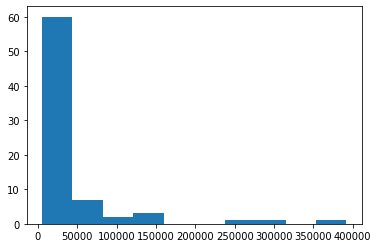

In [18]:
plt.hist(df[df['state']=='Arkansas']['population2019'], bins=10)

According to the histogram, Arkansas had 60 counties (first element in first array) for which the 2019 population estimate was less than 43,861 (second element in second array, showing the right edge of the first bin).

The following counts the number of rows in `df` for which the `state` is "Arkansas" and the `population2019` is less than 43,861, and it returns 60!

In [19]:
df[(df['state']=='Arkansas') & (df['population2019'] < 43861)].nunique()

state              1
county            60
population2019    60
deaths2019        57
fips              60
dtype: int64

#### Box Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x107ae2ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x107b5e5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x107ae2b00>],
 'medians': [<matplotlib.lines.Line2D at 0x107b5ec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x107b6b320>],
 'means': [<matplotlib.lines.Line2D at 0x107b5ef98>]}

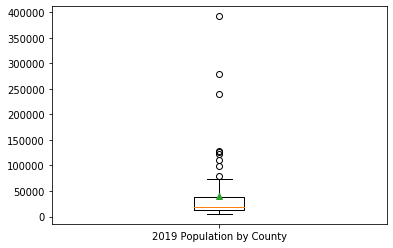

In [20]:
plt.boxplot(
    df[df['state'] == 'Arkansas']['population2019'],
    labels=['2019 Population by County'],
    showmeans=True)

From the box plot, it looks like the maximum value in the data is around 400,000, the median (orange line) appears to be below 25,000, and the mean (the green shape) is closer to 50,000. The `.describe` method on the same values indeed shows a `max` value of 391,911, a `median` (50th percentile) of 18,219 and a `mean` of about 40,237.

In [21]:
df[df['state'] == 'Arkansas']['population2019'].describe()

count        75.000000
mean      40237.386667
std       62605.549326
min        5189.000000
25%       12368.000000
50%       18219.000000
75%       38253.500000
max      391911.000000
Name: population2019, dtype: float64